In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [5]:
data = pd.read_csv('C:/Users/lizil/Dropbox/Job/Data/employee_retention.csv',parse_dates=['join_date','quit_date'])

In [6]:
data.head(10)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaT
7,716309.0,2,customer_service,4,30000.0,2014-03-05,NaT
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23
9,504159.0,1,sales,7,104000.0,2012-06-12,NaT


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [9]:
data.dtypes

employee_id           float64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

In [10]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [16]:
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

# Create Seperate Table for Day, Employee_Headcount, and Company_ID

In [18]:
unique_date = pd.date_range(start = '2011-01-24', end = '2015-12-13', freq='D')
unique_date

DatetimeIndex(['2011-01-24', '2011-01-25', '2011-01-26', '2011-01-27',
               '2011-01-28', '2011-01-29', '2011-01-30', '2011-01-31',
               '2011-02-01', '2011-02-02',
               ...
               '2015-12-04', '2015-12-05', '2015-12-06', '2015-12-07',
               '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11',
               '2015-12-12', '2015-12-13'],
              dtype='datetime64[ns]', length=1785, freq='D')

In [24]:
unique_company = sorted(data['company_id'].unique())

In [25]:
day, company, headcount = [], [], []

In [33]:
for date in unique_date:
    for idx in unique_company:
        total_join = len(data[(data['join_date']<=date) & (data['company_id']==idx)])
        total_quit = len(data[(data['quit_date'] <= date) & (data['company_id'] == idx)])
        day.append(date)
        company.append(idx)
        headcount.append(total_join-total_quit)

table = pd.DataFrame({'day':day, 'company_id':company, 'employee_headcount': headcount},
                    columns = ['day','company_id','employee_headcount'])


In [34]:
table.head()

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5


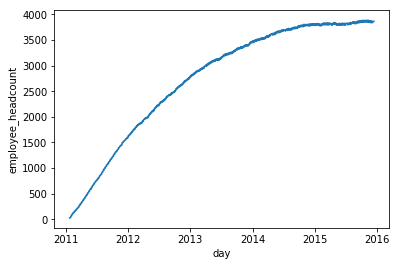

In [35]:
sns.lineplot(x=table[table['company_id']==1]['day'],y=table[table['company_id']==1]['employee_headcount'])

# Employee Churn Analysis

In [39]:
## Calculate the working days
quit_data = data[~data['quit_date'].isnull()]
stay_data = data[data['quit_date'].isnull()]
work_days = np.array(list(map(lambda x: x.days, quit_data['quit_date']-quit_data['join_date'])))

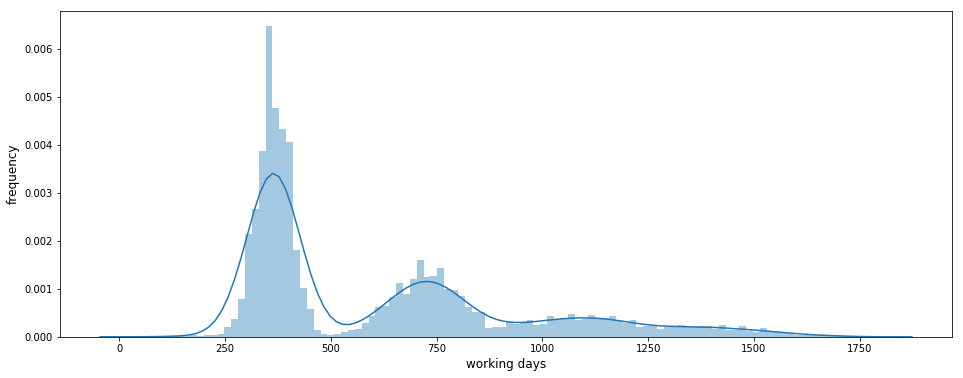

In [42]:
## plot the work days
fix, ax = plt.subplots(figsize = (16,6))
sns.distplot(work_days, bins = 100)
ax.set_xlabel('working days', fontsize = 12)
ax.set_ylabel('frequency',fontsize = 12)
plt.show()

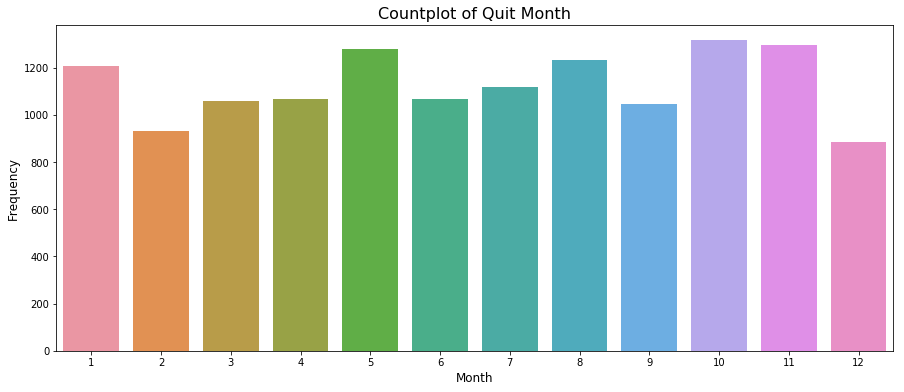

In [44]:
## which month for quit
quit_month = np.array(list(map(lambda x: x.month, quit_data['quit_date'])))

fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(quit_month, ax=ax)
ax.set_title('Countplot of Quit Month', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
## whcih week for quit
quit_week = np.array(list(map(lambda x: x.week, quit_data['quit_date'])))

fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(quit_week, ax=ax)
ax.set_title('Countplot of Quit Week No.', fontsize=16)
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [46]:
quit_data['work_days'] = work_days
quit_data['quit_week'] = quit_week

quit_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,work_days,quit_week
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,44
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340,14
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389,23
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040,34
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578,35


# Decision Tree Model

In [47]:
## assume 13 month quite is an early quit, we fisrt filter out those employees that joined less than 13 months as of 12-13-2015
stop_date = pd.to_datetime('2015-12-13') - pd.DateOffset(days=365 + 31)
subset = data[data['join_date'] < stop_date]


In [50]:
## create label for early quit versus not
quit = subset['quit_date'].isnull() | (subset['quit_date']>subset['join_date']+pd.DateOffset(days=396))
## these are those who are not early quit

In [52]:
subset['quit']=1-quit.astype(int)

In [53]:
## 1 is early quit, 0 is not early quit
subset.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0


In [54]:
## label encoder
le = LabelEncoder()
train_x = subset[['company_id', 'seniority', 'salary']]
train_x['dept'] = le.fit_transform(subset['dept'])
train_y = subset['quit'].values

train_x.head()

,company_id,seniority,salary,dept
0,7,28,89000.0,0
1,7,20,183000.0,4
2,4,14,101000.0,4
3,7,20,115000.0,0
4,2,23,276000.0,1


In [58]:
## Build the decision tree
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)
clf = clf.fit(X=train_x, y=train_y)

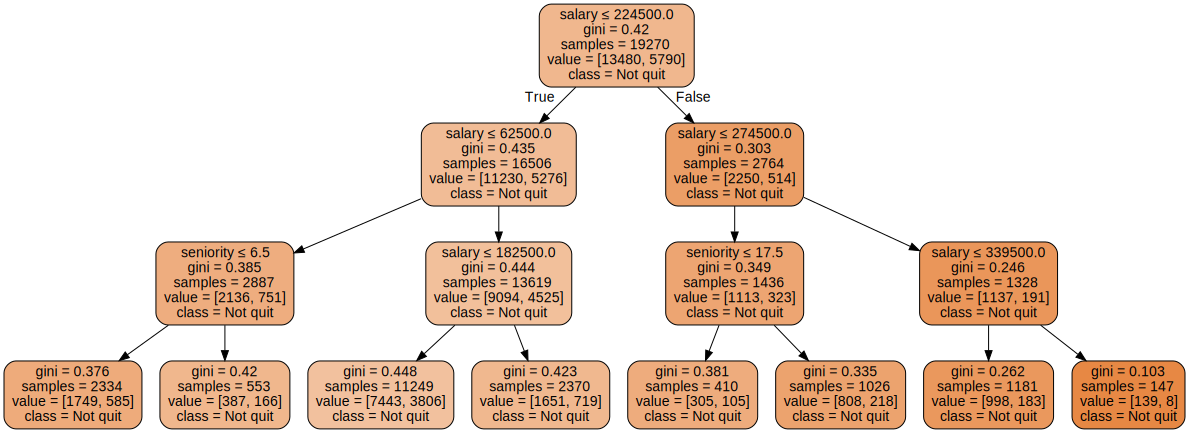

In [59]:
features = list(train_x.columns)
targets = ['Not quit', 'Quit']
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names=targets, 
                                filled=True, rounded=True, special_characters=True, )  
graph = graphviz.Source(dot_data)
graph

In [60]:
## Feature importance
importance = sorted(zip(features, clf.feature_importances_), key=lambda x:x[1], reverse=True)
for feature, val in importance:
    print('{0:10s} | {1:.5f}'.format(feature, val))

salary     | 0.97439
seniority  | 0.02561
company_id | 0.00000
dept       | 0.00000


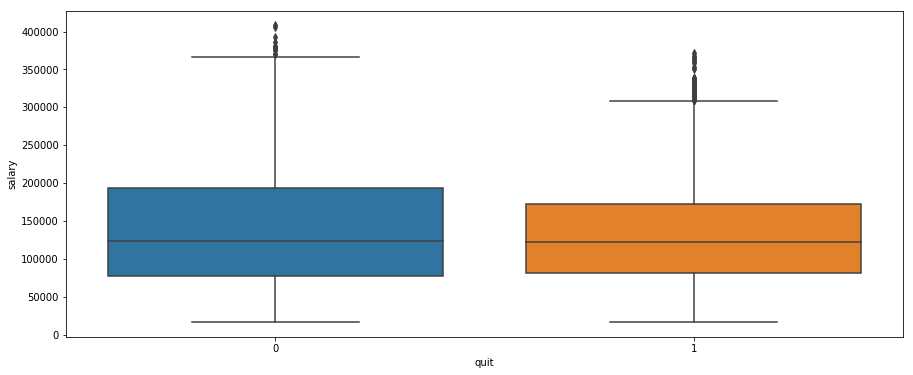

In [66]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='quit',y = 'salary',data=subset)
plt.show()

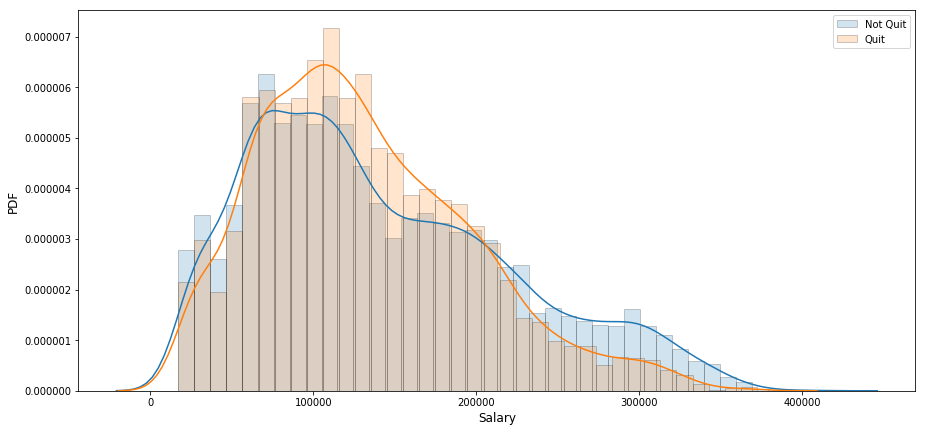

In [67]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(subset[subset['quit']==0]['salary'], 
             label='Not Quit', ax=ax, hist_kws=hist_kws)
sns.distplot(subset[subset['quit']==1]['salary'], 
             label='Quit', ax=ax, hist_kws=hist_kws)
ax.set_xlabel('Salary', fontsize=12)
ax.set_ylabel('PDF', fontsize=12)
ax.legend()
plt.show()

In [68]:
"""
key findings:
1. Salary is the main factor driving the employee churn. Low salary and high salary
group are more likely to stay, while the intermediate salary are more likely to churn.
it might be because low salary employee are not marketable and hard to find another job, while
high salary group are happy with the current position and has no intention to churn.

2. If adding one more variable to the data, I would like to know more about the salary 
related factors, such as the base/bonus, the pay raise, and the pay increase if churn and 
join to another company.

"""

'\nkey findings:\n1. Salary is the main factor driving the employee churn. Low salary and high salary\ngroup are more likely to stay, while the intermediate salary are more likely to churn.\nit might be because low salary employee are not marketable and hard to find another job, while\nhigh salary group are happy with the current position and has no intention to churn.\n\n2. If adding one more variable to the data, I would like to know more about the salary \nrelated factors, such as the base/bonus, the pay raise, and the pay increase if churn and \njoin to another company.\n\n'